# MLP for images with Keras

In this notebook I will show you how to build and train a MLP for image classification and regression usign MNIST dataset.

In [5]:
!pip install tensorflow
!pip install keras

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scikeras.wrappers import KerasClassifier


import matplotlib.pyplot as plt

%matplotlib inline

## Load the data

In [8]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f'x_train.shape = {x_train.shape} - y_train.shape = {y_train.shape}')
print(f'x_test.shape = {x_test.shape} - y_test.shape = {y_test.shape}')

x_train.shape = (60000, 28, 28) - y_train.shape = (60000,)
x_test.shape = (10000, 28, 28) - y_test.shape = (10000,)


In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Feature Engineering

In [10]:
# It's common to use MinMax(0,1) normalization for images
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255

# We can feed our MLP with squared images, we must flatten them first
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)
print(f'New x_train.shape: {x_train.shape}')
print(f'New x_test.shape: {x_test.shape}')


New x_train.shape: (60000, 784)
New x_test.shape: (10000, 784)


In [11]:
x_train[0].shape

(784,)

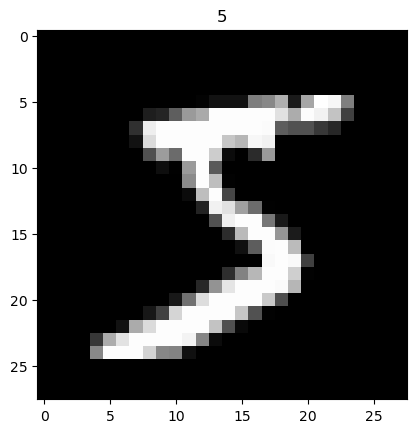

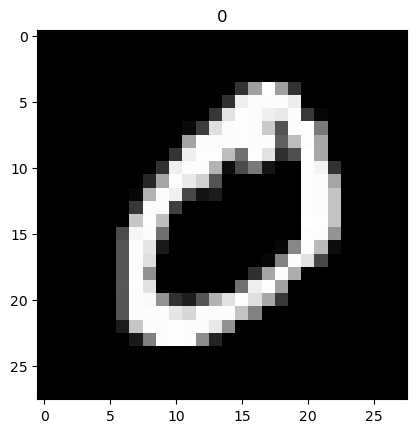

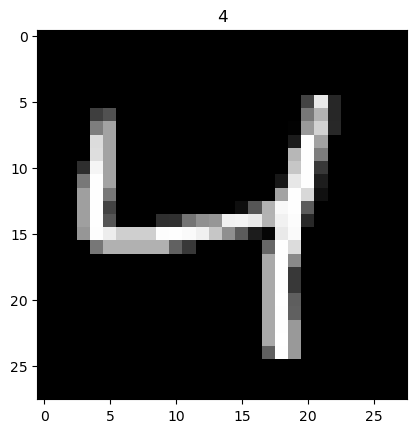

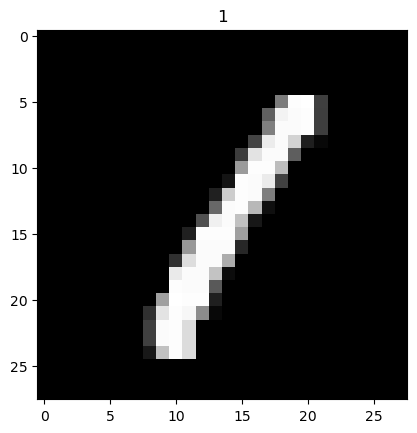

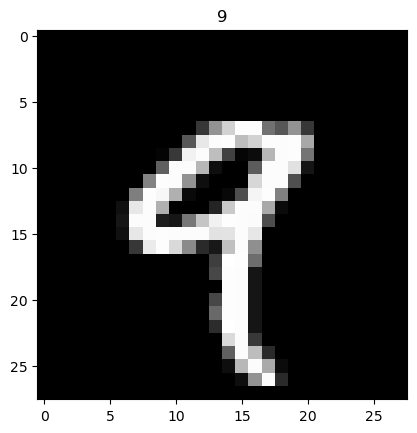

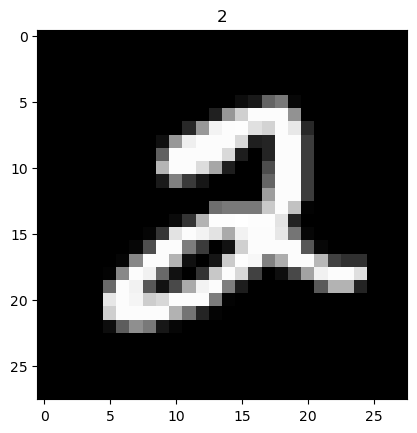

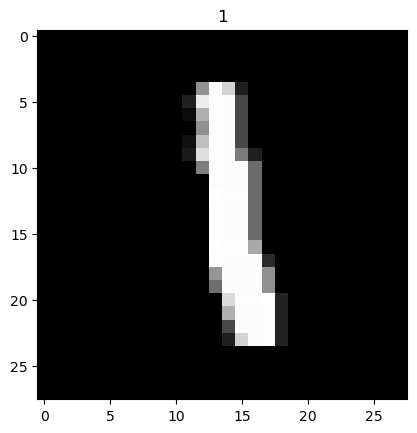

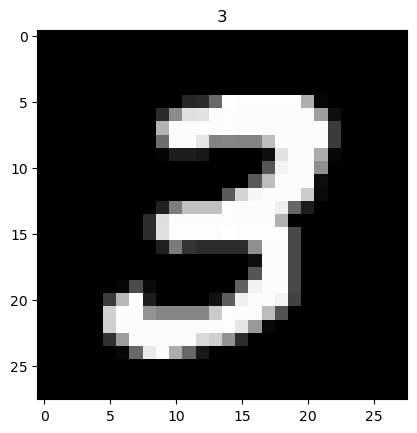

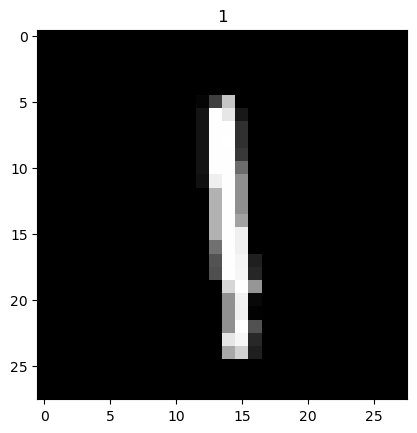

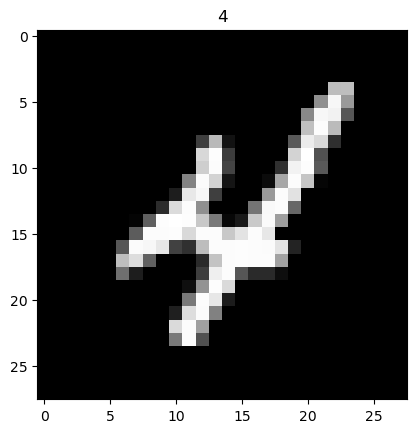

In [12]:
# Let's visualize some images
plt.gray()
for i in range(10):
    plt.imshow(x_train[i].reshape(28, 28))
    plt.title(y_train[i])
    plt.show()

## Building the model

It will have:

    - 2 hidden layers with 16 neurons each
    - 1 output layer with 10 neurons (1 for each class)
    - Batch size of 32 during training


In [13]:
input_shape = x_train[0].shape

# Build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(16, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(10, activation='softmax')
    ]
)

# Now we must copile it
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

print('Summary:')
model.summary()

Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13002 (50.79 KB)
Trainable params: 13002 (50.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training the model

In [14]:
print("\nTraining...")
history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=32,
    callbacks=[
      keras.callbacks.EarlyStopping(patience=2),
    ]
)


Training...
Epoch 1/15
1500/1500 [==============================] - 2s 915us/step - loss: 0.6267 - accuracy: 0.8069 - val_loss: 0.2621 - val_accuracy: 0.9265
Epoch 2/15
1500/1500 [==============================] - 1s 694us/step - loss: 0.3204 - accuracy: 0.9051 - val_loss: 0.2222 - val_accuracy: 0.9367
Epoch 3/15
1500/1500 [==============================] - 1s 744us/step - loss: 0.2701 - accuracy: 0.9197 - val_loss: 0.2033 - val_accuracy: 0.9408
Epoch 4/15
1500/1500 [==============================] - 1s 713us/step - loss: 0.2414 - accuracy: 0.9292 - val_loss: 0.1933 - val_accuracy: 0.9434
Epoch 5/15
1500/1500 [==============================] - 1s 673us/step - loss: 0.2254 - accuracy: 0.9326 - val_loss: 0.1839 - val_accuracy: 0.9469
Epoch 6/15
1500/1500 [==============================] - 1s 694us/step - loss: 0.2151 - accuracy: 0.9365 - val_loss: 0.1811 - val_accuracy: 0.9469
Epoch 7/15
1500/1500 [==============================] - 1s 698us/step - loss: 0.2023 - accuracy: 0.9401 - val_l

### Let's see some plots

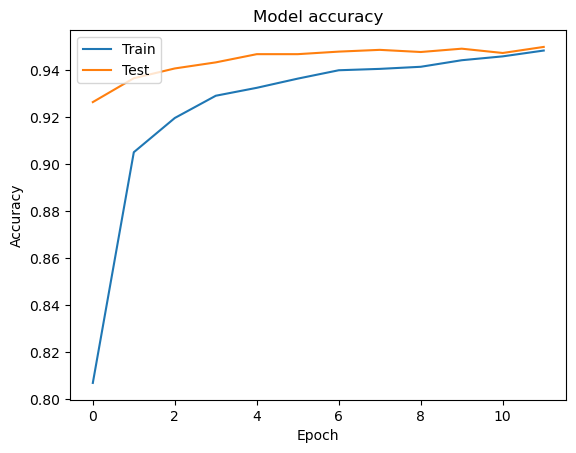

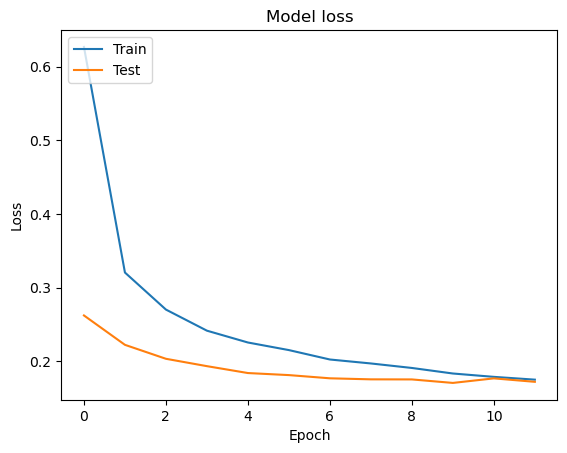

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Using the model


In [16]:
x_test[0].shape

(784,)

In [17]:
x_test[0].reshape(1, -1).shape

(1, 784)

In [18]:
prediction = model.predict(x_test[0].reshape(1, -1))
prediction

1/1 [==============================] - 0s 64ms/step


array([[5.2916654e-05, 4.0267792e-06, 2.6002040e-04, 2.9398687e-04,
        1.2153529e-08, 1.3561211e-05, 4.3742058e-13, 9.9937147e-01,
        2.1136856e-07, 3.7468117e-06]], dtype=float32)

In [19]:
pred_class = prediction.argmax(axis=1)[0]
pred_class

7

In [20]:
prediction[0][pred_class]

0.99937147

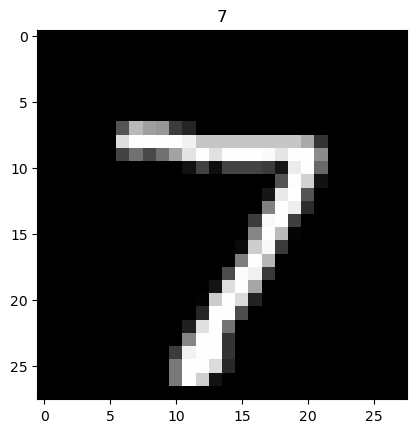

In [21]:
plt.imshow(x_test[0].reshape(28, 28))
plt.title(y_test[0])
plt.show()

Evaluate the model on all the testing set, never used yet

In [22]:
# Predict over test
y_test_pred = model.predict(x_test)

# Get predicted class from probabilities
y_test_pred_cat = y_test_pred.argmax(axis=1)

# Evaluamos el accuracy score
accuracy_score(y_true=y_test, y_pred=y_test_pred_cat)

313/313 [==============================] - 0s 467us/step


0.9475

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred_cat))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.95      0.92      0.94      1010
           4       0.92      0.97      0.94       982
           5       0.95      0.92      0.94       892
           6       0.96      0.95      0.95       958
           7       0.95      0.94      0.95      1028
           8       0.91      0.94      0.93       974
           9       0.96      0.91      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



---

# MLP for regression

Let's now think this problem as a regression. We will predict one number between 0 and 9 instead a of class.


In [24]:
# Input shape will be the same
input_shape = x_train[0].shape

# Output shape now is different!
# Note: Activation function in the output layer
# can't be softmax in this case
num_classes = 1

# Define the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(16, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(num_classes, activation='linear')
    ]
)

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

print('Summary:')
model.summary()


Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                12560     
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12849 (50.19 KB)
Trainable params: 12849 (50.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
print("\nTraining...")
history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=32,
)



Training...
Epoch 1/15
1500/1500 [==============================] - 2s 1ms/step - loss: 3.1657 - mae: 1.2998 - val_loss: 1.7301 - val_mae: 0.9148
Epoch 2/15
1500/1500 [==============================] - 1s 686us/step - loss: 1.4981 - mae: 0.8391 - val_loss: 1.2491 - val_mae: 0.7455
Epoch 3/15
1500/1500 [==============================] - 1s 779us/step - loss: 1.1115 - mae: 0.6907 - val_loss: 1.0453 - val_mae: 0.6558
Epoch 4/15
1500/1500 [==============================] - 1s 619us/step - loss: 0.9771 - mae: 0.6304 - val_loss: 0.9300 - val_mae: 0.6029
Epoch 5/15
1500/1500 [==============================] - 1s 632us/step - loss: 0.9094 - mae: 0.5996 - val_loss: 0.9690 - val_mae: 0.6086
Epoch 6/15
1500/1500 [==============================] - 1s 621us/step - loss: 0.8548 - mae: 0.5739 - val_loss: 0.9124 - val_mae: 0.5933
Epoch 7/15
1500/1500 [==============================] - 1s 632us/step - loss: 0.8109 - mae: 0.5547 - val_loss: 0.8898 - val_mae: 0.5684
Epoch 8/15
1500/1500 [===============

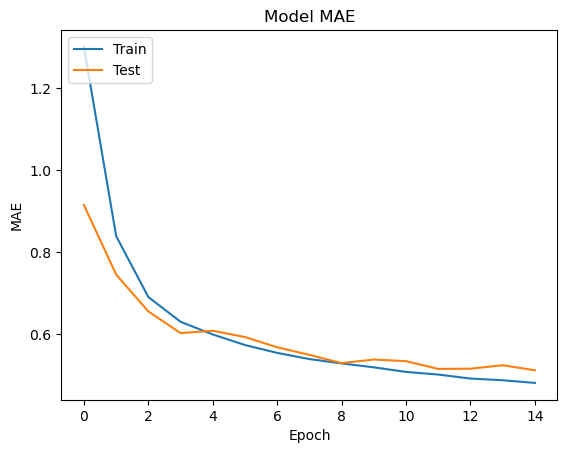

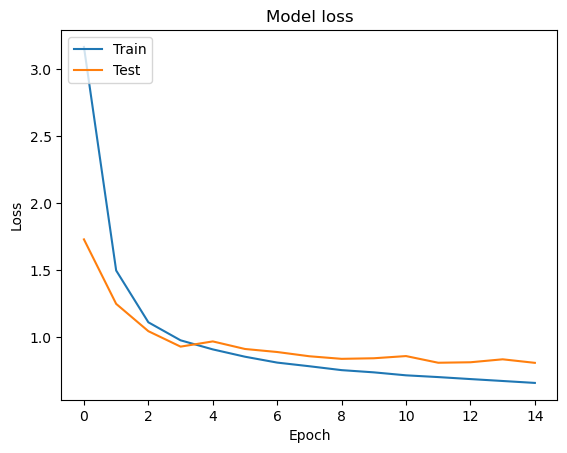

In [26]:
# Plot training & validation MAE values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [27]:
prediction = model.predict(x_test[1].reshape(1, -1))
prediction

1/1 [==============================] - 0s 34ms/step


array([[2.0546045]], dtype=float32)

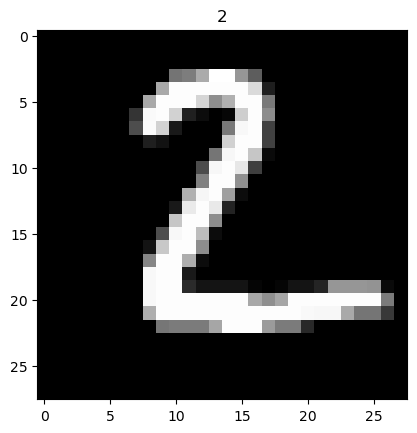

In [28]:
plt.imshow(x_test[1].reshape(28, 28))
plt.title(y_test[1])
plt.show()